# Iteración 2 - Modelo Mixto con IV + Dummies relevantes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
original = pd.read_csv("Copia de Dataset_vuelos.csv",nrows=5500)

In [3]:
original = original.drop(columns=['FlightDate', 'ArrDelay', 'ArrDelayMinutes', 'AirTime'], errors='ignore')
original = original.dropna()

In [4]:
# Oversampling manual
df_0 = original[original['is_delay'] == 0]
df_1 = original[original['is_delay'] == 1]
df_1_oversampled = df_1.sample(n=len(df_0), replace=True, random_state=42)
df_balanced = pd.concat([df_0, df_1_oversampled]).sample(frac=1, random_state=42)

In [5]:
# IV + Dummies relevantes
features = [
    'CRSDepTime', 'Month', 'Year', 'DayOfWeek',
    'OriginState_GA', 'Dest_SFO', 'Reporting_Airline_DL'
]

In [6]:
cat_cols = ['Origin', 'Dest', 'OriginState', 'Reporting_Airline']
df_balanced_dummies = pd.get_dummies(df_balanced, columns=cat_cols, drop_first=True, dtype=int)

In [7]:
X = df_balanced_dummies[features]
y = df_balanced_dummies['is_delay']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(C=0.5, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=10000)

In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

In [11]:
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"KS: {ks:.3f}")

Matriz de Confusión:
[[747 557]
 [531 773]]
Accuracy: 0.583
Precision: 0.581
Recall: 0.593
KS: 0.169


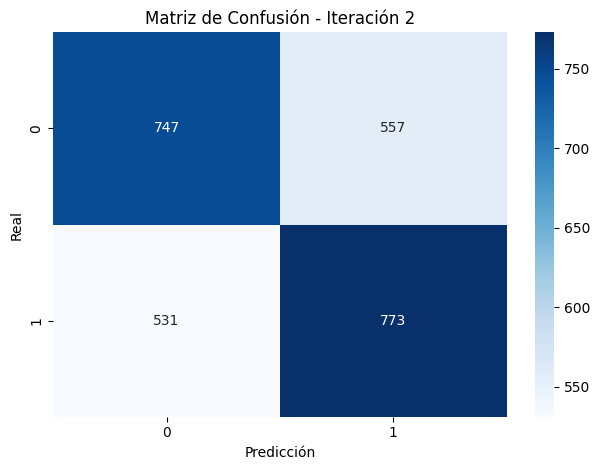

In [12]:
# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Iteración 2")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()